       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.067059    0.523008   
std     257.353842    0.486592    0.836071   12.219127    1.102743   
min       1.000000    0.000000    1.000000    0.670000    0.000000   
25%     223.500000    0.000000    2.000000   24.000000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   34.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


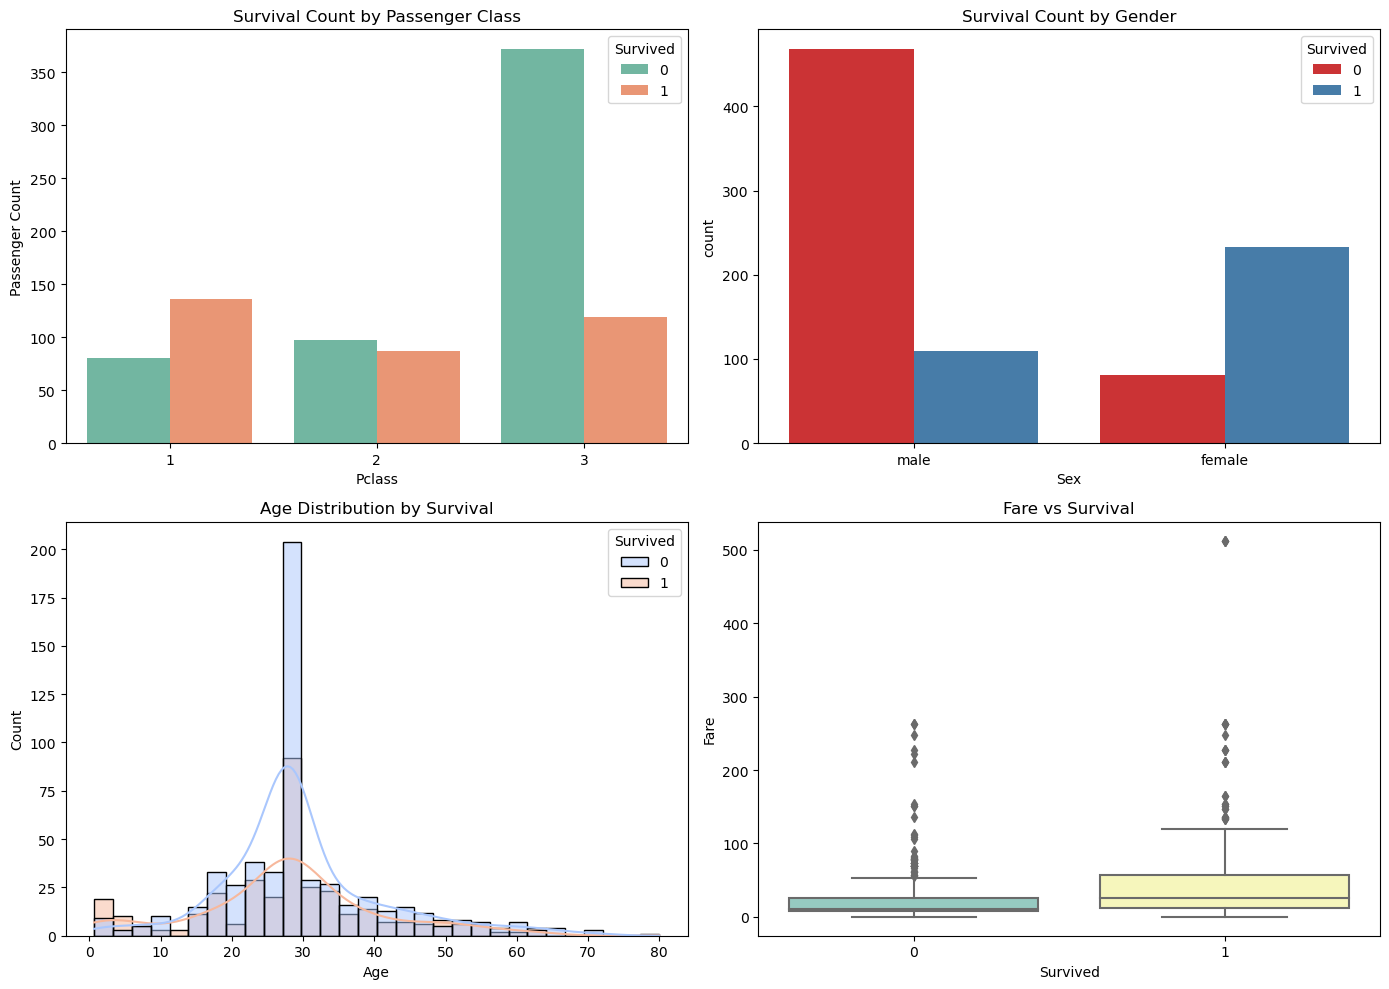

In [1]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

data=pd.read_csv('Titanic-Dataset.csv')

titanic_df = pd.DataFrame(data)

# Data Cleaning: Handle missing values (simulating some missing data)
titanic_df.loc[np.random.choice(titanic_df.index, size=100, replace=False), 'Age'] = np.nan
titanic_df.loc[np.random.choice(titanic_df.index, size=10, replace=False), 'Embarked'] = np.nan

# Filling missing 'Age' values with median
titanic_df['Age'].fillna(titanic_df['Age'].median(), inplace=True)

# Filling missing 'Embarked' values with most common value (mode)
titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0], inplace=True)

# Data Summary: Descriptive statistics
print(titanic_df.describe())

# Visualizing relationships
plt.figure(figsize=(14, 10))

# 1. Survival vs Passenger Class
plt.subplot(2, 2, 1)
sns.countplot(data=titanic_df, x='Pclass', hue='Survived', palette='Set2')
plt.title('Survival Count by Passenger Class')
plt.ylabel('Passenger Count')

# 2. Survival vs Gender
plt.subplot(2, 2, 2)
sns.countplot(data=titanic_df, x='Sex', hue='Survived', palette='Set1')
plt.title('Survival Count by Gender')

# 3. Age Distribution by Survival
plt.subplot(2, 2, 3)
sns.histplot(data=titanic_df, x='Age', hue='Survived', kde=True, palette='coolwarm', bins=30)
plt.title('Age Distribution by Survival')

# 4. Fare vs Survived
plt.subplot(2, 2, 4)
sns.boxplot(data=titanic_df, x='Survived', y='Fare', palette='Set3')
plt.title('Fare vs Survival')

plt.tight_layout()
plt.show()
